# To Predict whether a customer will opt for Term Depoist or not by using various classification models

# 1. Loading Libraries and Dataset

In [1]:
# Load libraries
%matplotlib inline
import matplotlib.pyplot as plt
#setting dimension of graph
plt.rcParams["figure.figsize"]= (13, 6)

import pandas as pd
import numpy as np
import seaborn as sns

from pandas.tools.plotting import scatter_matrix

# All required once of sklearn for model and preprocessing stuff
from sklearn.preprocessing import scale
from sklearn.preprocessing import Imputer
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
# Load dataset
dataset = pd.read_csv("usecase-2.csv")

# 2. Data Exploration

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null float64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null float64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null float64
month        45211 non-null object
duration     45211 non-null float64
campaign     45211 non-null float64
pdays        45211 non-null float64
previous     45211 non-null float64
poutcome     45211 non-null object
output       45211 non-null object
dtypes: float64(7), object(10)
memory usage: 5.9+ MB


45211 observations and 17 variables (7-Numerical Variables and 10-Categorical Variables).

In [4]:
#check for any missing values
dataset.apply(lambda x: sum(x.isnull()),axis=0)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
output       0
dtype: int64

In [5]:
# Target variable distribution
count = dataset.groupby('output').size()
percent = count/len(dataset)*100
print(percent)

output
no     88.30152
yes    11.69848
dtype: float64


### From the distribution of Target variable: "output" it is found that data is imbalanced becouse there is approx 88% is 'no' and 12% is 'yes'.

In [6]:
# Summary statistics of quantitative variables and categorical variables
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


We make the following observations from the descriptive statistics above:
    'prev_contacts' = 0 for most of the data
    Rest of the continuous variables seem clean and well populated.

In [7]:
dataset.describe(include=["object"])

,job,marital,education,default,housing,loan,contact,month,poutcome,output
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


## Analysis of Indepedent Numerical Variables

In [8]:
categorical_vars = dataset.describe(include=["object"]).columns
continuous_vars = dataset.describe().columns

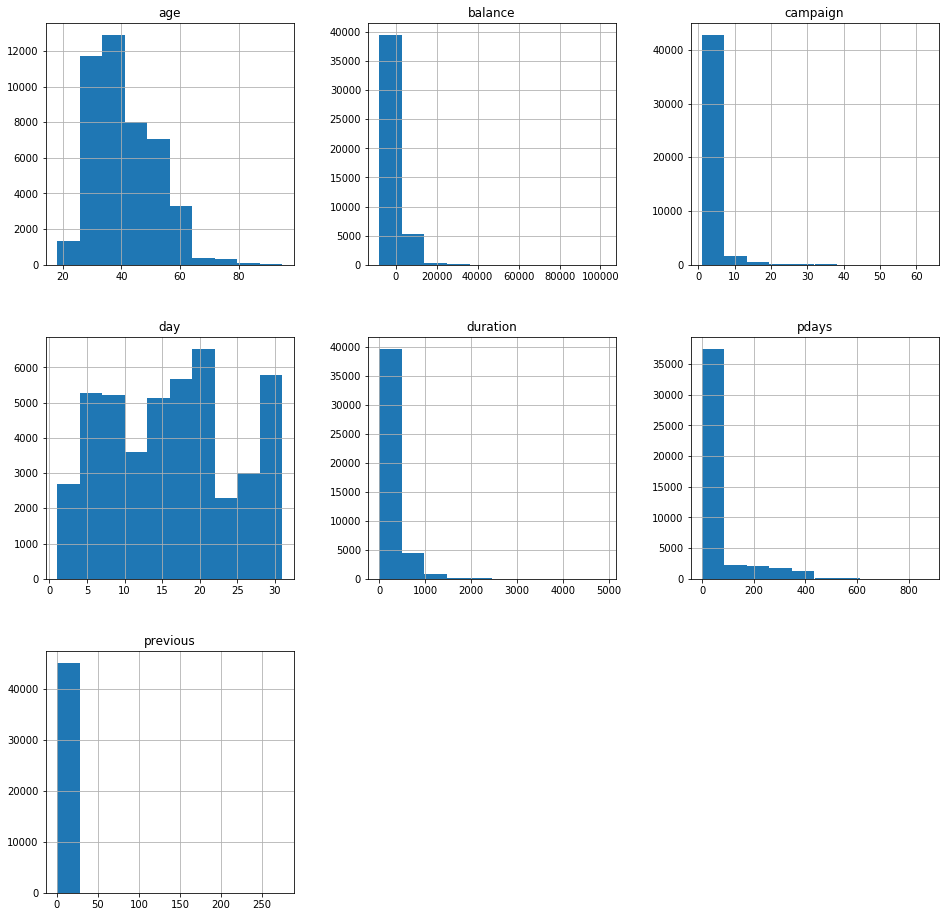

In [9]:
_ = dataset.hist(column=continuous_vars, figsize = (16,16))

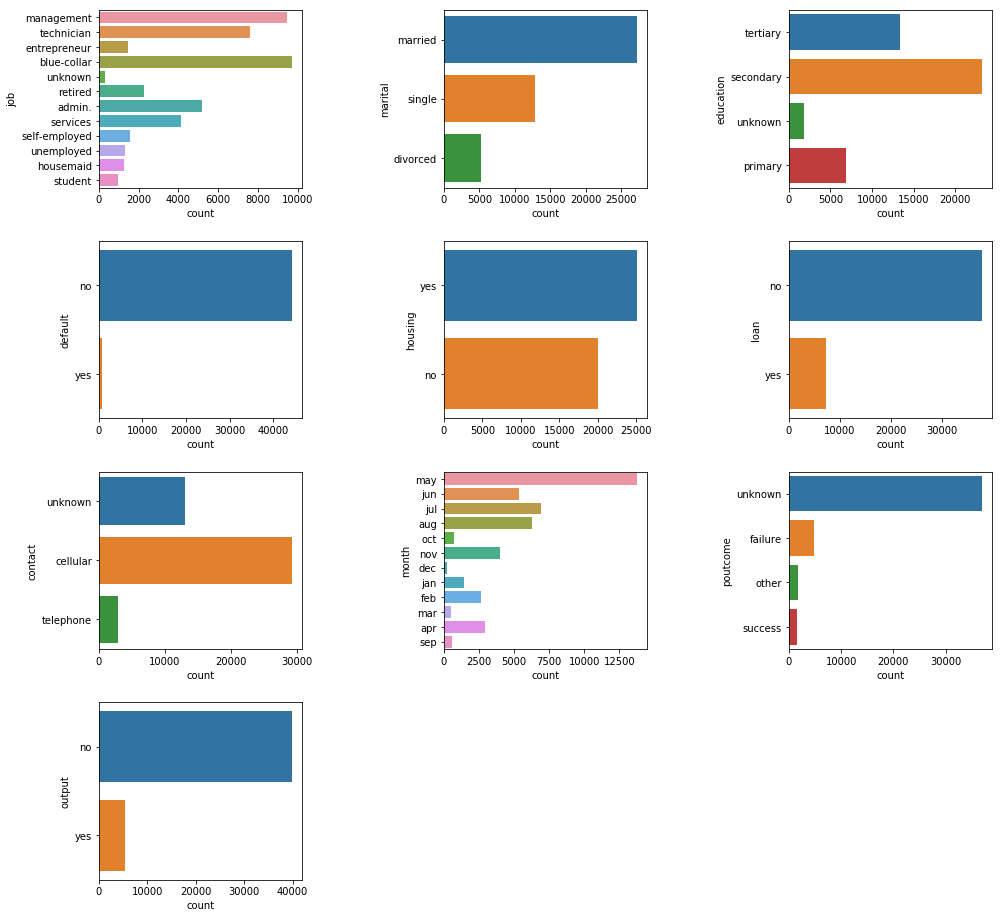

In [10]:
# Count plots of categorical variables

fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=dataset, ax=ax)

In [11]:
# Impute outliers function used to make the data to be in the limits of gaussian distribuion
def impute_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [12]:
# Check dist. of various numeric variables and to check and chnage dist.
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


From the above result one can see that some variables ('balance', 'duration', 'campaign', 'pdays', 'previous') has outliers.
That can also visualize through graph further.

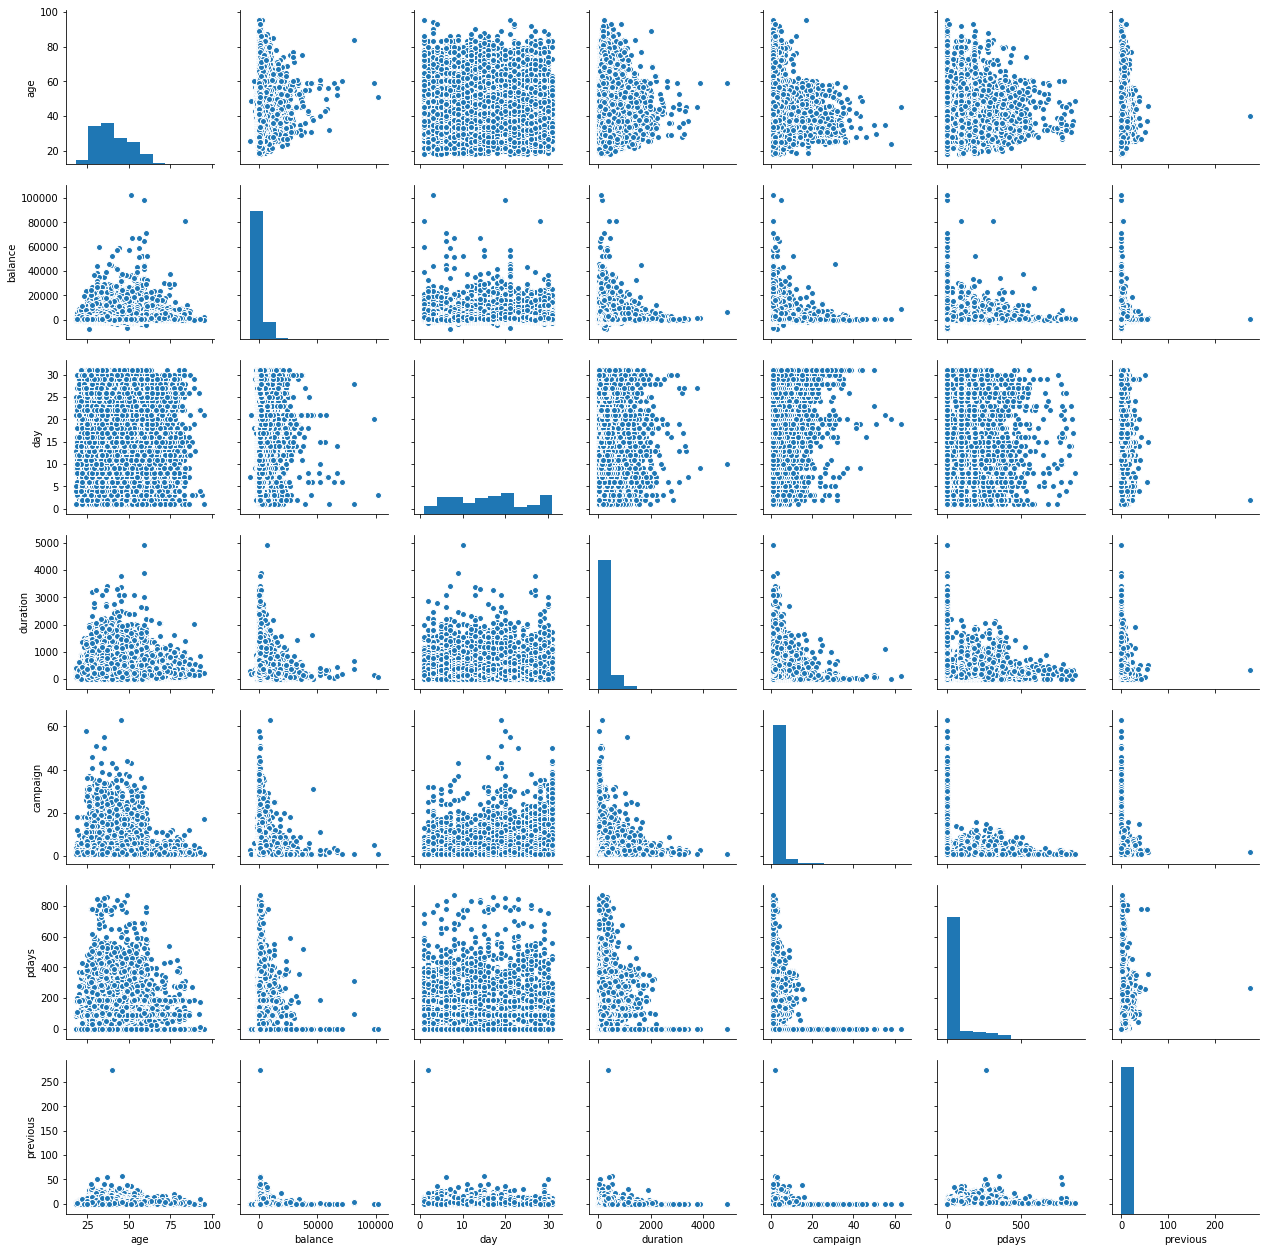

In [13]:
# scatter plot matrix
sns.pairplot(dataset)

Scatter plot matrix showing that there is no strong relationship between these indepedent variables (no multicollinearity among these).

We will check the every numeric and get the outliers

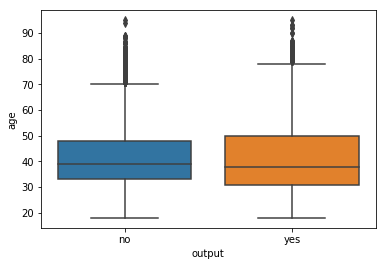

In [14]:
# age
sns.boxplot(x='output', y='age', data=dataset)

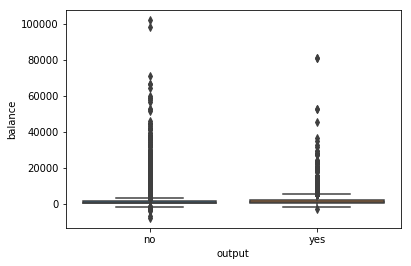

In [15]:
# Balance
sns.boxplot(x='output', y='balance', data=dataset)

In [16]:
# Fixing balance column
dataset_new = dataset
min_val = dataset_new["balance"].min()
max_val = 20000
dataset_new = impute_outliers(df=dataset_new, column='balance' , minimum=min_val, maximum=max_val)

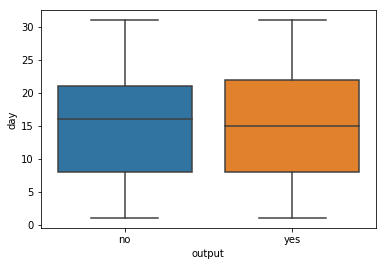

In [17]:
#day
sns.boxplot(x='output', y='day', data=dataset)

#### "duration"

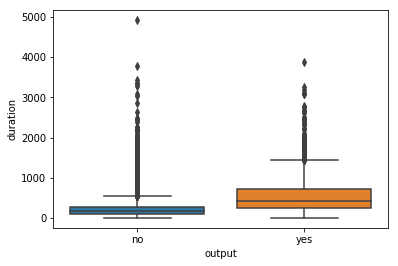

In [18]:
sns.boxplot(x='output', y='duration', data=dataset)

In [19]:
# Fixing duration column
min_val = dataset_new["duration"].min()
max_val = 2000
dataset_new = impute_outliers(df=dataset_new, column='duration' , minimum=min_val, maximum=max_val)

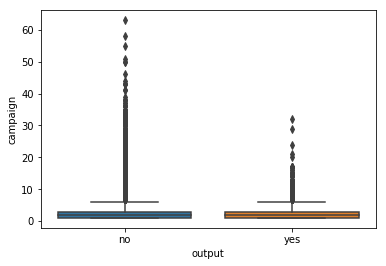

In [20]:
#### "compaign"
sns.boxplot(x='output', y='campaign', data=dataset)

In [21]:
# Fixing campaign column
min_val = dataset_new["campaign"].min()
max_val = 20
dataset_new = impute_outliers(df=dataset_new, column='campaign' , minimum=min_val, maximum=max_val)

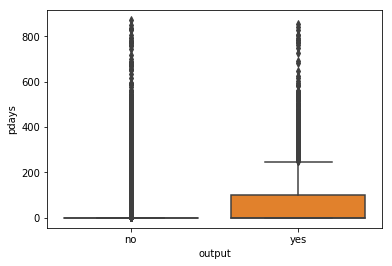

In [22]:
#### "pdays"
sns.boxplot(x='output', y='pdays', data=dataset)

In [23]:
# Fixing pdays column
min_val = dataset_new["pdays"].min()
max_val = 250
dataset_new = impute_outliers(df=dataset_new, column='pdays' , minimum=min_val, maximum=max_val)

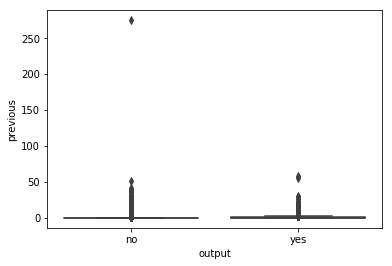

In [24]:
#### "previous"
sns.boxplot(x='output', y='previous', data=dataset)

In [25]:
# Fixing 'previous' column
min_val = dataset_new["previous"].min()
max_val = 15
dataset_new = impute_outliers(df=dataset_new, column='previous' , minimum=min_val, maximum=max_val)

In [26]:
#lets see statistic of Numerical variables after Outlier treatment
dataset_new.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1239.089967,15.806419,255.154379,2.630474,17.370434,0.520972
std,10.618762,2213.867032,8.322476,242.792228,2.456852,47.938636,1.512395
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1397.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,19985.000000,31.000000,1994.000000,20.000000,250.000000,15.000000


Now the data seems quite stable comparision to original.

## Analysis of Indepedent Categorical Variables

In [27]:
# Impute unknowns function
def impute_unknowns(df, column):
    col_values = df[column].values
    df[column] = np.where(col_values=='unknown', dataset[column].mode(), col_values)
    return df

job
admin.           11.437482
blue-collar      21.525735
entrepreneur      3.289023
housemaid         2.742695
management       20.919688
retired           5.007631
self-employed     3.492513
services          9.188029
student           2.074716
technician       16.803433
unemployed        2.882042
unknown           0.637013
dtype: float64


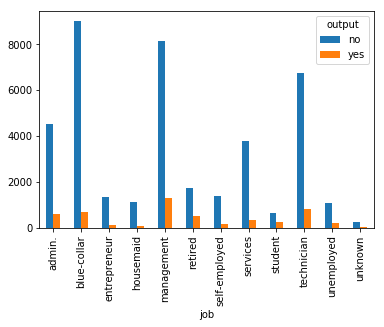

In [28]:
# job
temp1 = pd.crosstab(dataset['job'], dataset['output'])
temp1.plot(kind='bar')
print(dataset.groupby(['job']).size()/len(dataset)*100) 

In [29]:
# Fixing 'job' column
dataset_new = impute_unknowns(df=dataset_new, column='job')

marital
divorced    11.517109
married     60.193316
single      28.289576
dtype: float64


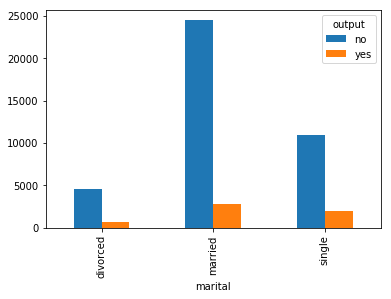

In [30]:
# marital
temp2 = pd.crosstab(dataset['marital'], dataset['output'])
temp2.plot(kind='bar')
print(dataset.groupby(['marital']).size()/len(dataset)*100) 

education
primary      15.153392
secondary    51.319369
tertiary     29.419831
unknown       4.107407
dtype: float64


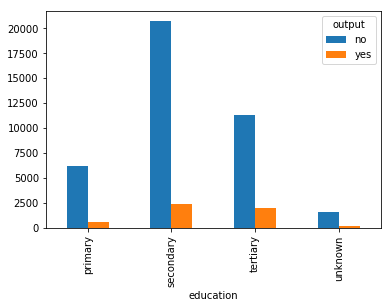

In [31]:
# education
temp3 = pd.crosstab(dataset['education'], dataset['output'])
temp3.plot(kind='bar')
print(dataset.groupby(['education']).size()/len(dataset)*100) 

In [32]:
# Fixing 'education' column
dataset_new = impute_unknowns(df=dataset_new, column='education')

default
no     98.197341
yes     1.802659
dtype: float64


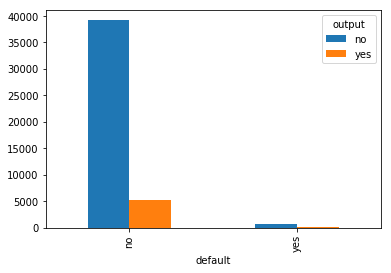

In [33]:
# default
temp4 = pd.crosstab(dataset['default'], dataset['output'])
temp4.plot(kind='bar')
print(dataset.groupby(['default']).size()/len(dataset)*100) 

#### This variable seems highly unbalanced (skewed) so we can drop this.

In [34]:
#dropping variable 'default'
del dataset_new['default']

housing
no     44.416182
yes    55.583818
dtype: float64


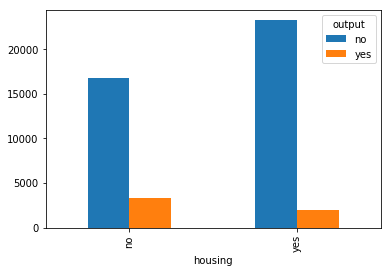

In [35]:
# housing
temp5 = pd.crosstab(dataset['housing'], dataset['output'])
temp5.plot(kind='bar')
print(dataset.groupby(['housing']).size()/len(dataset)*100) 

contact
cellular     64.774059
telephone     6.427639
unknown      28.798301
dtype: float64


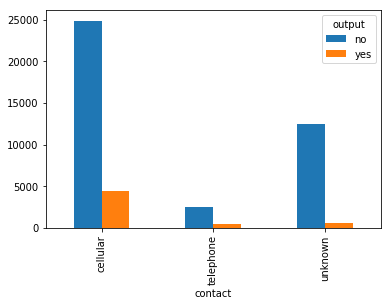

In [36]:
# "contact"
temp6 = pd.crosstab(dataset['contact'], dataset['output'])
temp6.plot(kind='bar')
print(dataset.groupby(['contact']).size()/len(dataset)*100) 

In [37]:
# 'Contact' variable does not have any impact on target variable so we can drop this variable.
del dataset_new['contact']

month
apr     6.485147
aug    13.817434
dec     0.473336
feb     5.859194
jan     3.103227
jul    15.250713
jun    11.813497
mar     1.055053
may    30.448342
nov     8.781049
oct     1.632346
sep     1.280662
dtype: float64


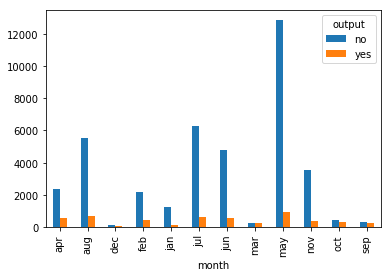

In [38]:
# "month"
temp7 = pd.crosstab(dataset['month'], dataset['output'])
temp7.plot(kind='bar')
print(dataset.groupby(['month']).size()/len(dataset)*100) 

poutcome
failure    10.840282
other       4.069806
success     3.342107
unknown    81.747805
dtype: float64


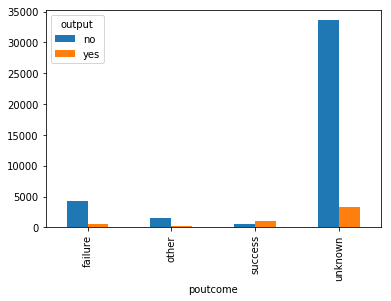

In [39]:
# "poutcome"
temp8 = pd.crosstab(dataset['poutcome'], dataset['output'])
temp8.plot(kind='bar')
print(dataset.groupby(['poutcome']).size()/len(dataset)*100) 

"poutcome" also have more than 81% missing values so we can drop this variable also.

In [40]:
#dropping variable 'poutcome'
del dataset_new['poutcome']

loan
no     83.977351
yes    16.022649
dtype: float64


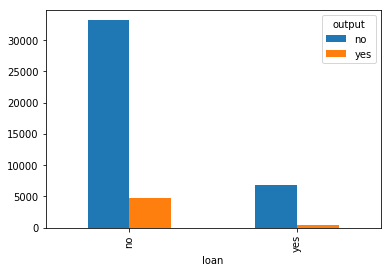

In [41]:
# "loan"
temp9 = pd.crosstab(dataset['loan'], dataset['output'])
temp9.plot(kind='bar')
print(dataset.groupby(['loan']).size()/len(dataset)*100) 

### After EDA Dataset

In [42]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
age          45211 non-null float64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
balance      45211 non-null float64
housing      45211 non-null object
loan         45211 non-null object
day          45211 non-null float64
month        45211 non-null object
duration     45211 non-null float64
campaign     45211 non-null float64
pdays        45211 non-null float64
previous     45211 non-null float64
output       45211 non-null object
dtypes: float64(7), object(7)
memory usage: 4.8+ MB


Now total variables are 14 because we have removed 3 categorical variables.

# 3. Model Building

In [43]:
#Seperating Target variable from other variables
dataset_Y = dataset_new['output']
dataset_X = dataset_new[dataset_new.columns[0:12]]

In [44]:
#converting Independent Categorical into Numeriacal by creating Dummy variables
dataset_X_dummy = pd.get_dummies(dataset_X)
print(dataset_X_dummy.head())

    age  balance  day  duration  campaign  pdays  job_admin.  job_blue-collar  \
0  58.0   2143.0  5.0     261.0       1.0   -1.0           0                0   
1  44.0     29.0  5.0     151.0       1.0   -1.0           0                0   
2  33.0      2.0  5.0      76.0       1.0   -1.0           0                0   
3  47.0   1506.0  5.0      92.0       1.0   -1.0           0                1   
4  33.0      1.0  5.0     198.0       1.0   -1.0           0                1   

   job_entrepreneur  job_housemaid    ...      month_dec  month_feb  \
0                 0              0    ...              0          0   
1                 0              0    ...              0          0   
2                 1              0    ...              0          0   
3                 0              0    ...              0          0   
4                 0              0    ...              0          0   

   month_jan  month_jul  month_jun  month_mar  month_may  month_nov  \
0          0   

#### After creating Dummy Variables we have now 39 Variables.

In [66]:
#converting dataframe into numpy Array
X = dataset_X_dummy.values
Y = dataset_Y.values

# Split-out validation dataset
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [67]:
#Scaling the values
X_t = scale(X_train)

#### From Cumulative Variance plot we can find that first 32 components are explaining nearly 100% variability of actual data.
#### So we will proceed with only 32 components for further modelling.

# 4. Model Training

In [47]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

#### Implementing Logistic Regression(LR), Linear Discriminant Analysis(LDA), K-Nearest Neighbor(K-NN), Decision Tree(CART), Naive Bayes(NB) and Random Forest(RF)

In [62]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

In [49]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_t, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.892281 (0.004838)


c:\users\siri\anaconda3\envs\tensorflow\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\siri\anaconda3\envs\tensorflow\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\siri\anaconda3\envs\tensorflow\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\siri\anaconda3\envs\tensorflow\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\siri\anaconda3\envs\tensorflow\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\siri\anaconda3\envs\tensorflow\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: V

LDA: 0.891119 (0.004559)
K-NN: 0.883350 (0.004390)
CART: 0.870079 (0.004762)
NB: 0.859987 (0.006162)
RF: 0.894797 (0.004325)


# 6. Model Selection

[Text(0,0,'LR'),
 Text(0,0,'LDA'),
 Text(0,0,'K-NN'),
 Text(0,0,'CART'),
 Text(0,0,'NB'),
 Text(0,0,'RF')]

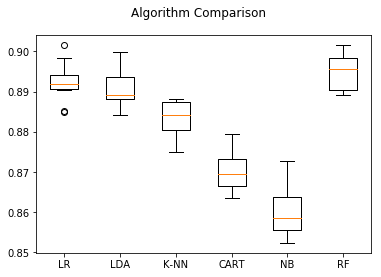

In [50]:
# Comparing Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

#### According to Accuracy and Computation Time Logistic Regression seems the best model.

# 7. Making Prediction

In [72]:
#Scaling the X_validation data
X_test = scale(X_test)

In [73]:
# Make predictions on validation dataset by choosing best Algorithm
kn = KNeighborsClassifier()
kn.fit(X_t, Y_train)
predictions = kn.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Accuracy :  0.8914077186774301
[[7787  240]
 [ 742  274]]
             precision    recall  f1-score   support

         no       0.91      0.97      0.94      8027
        yes       0.53      0.27      0.36      1016

avg / total       0.87      0.89      0.88      9043



In [74]:
# Make predictions on validation dataset by choosing best Algorithm
lr = LogisticRegression()
lr.fit(X_t, Y_train)
predictions = lr.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Accuracy :  0.901249585314608
[[7840  187]
 [ 706  310]]
             precision    recall  f1-score   support

         no       0.92      0.98      0.95      8027
        yes       0.62      0.31      0.41      1016

avg / total       0.88      0.90      0.89      9043



In [75]:
# Make predictions on validation dataset by choosing best Algorithm
ld = LinearDiscriminantAnalysis()
ld.fit(X_t, Y_train)
predictions = ld.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Accuracy :  0.8981532677208891
[[7696  331]
 [ 590  426]]
             precision    recall  f1-score   support

         no       0.93      0.96      0.94      8027
        yes       0.56      0.42      0.48      1016

avg / total       0.89      0.90      0.89      9043



c:\users\siri\anaconda3\envs\tensorflow\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [56]:
# Make predictions on validation dataset by choosing best Algorithm
rf = RandomForestClassifier()
rf.fit(X_t, Y_train)
predictions = rf.predict(X_v)
print("Accuracy : ", accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy :  0.8974897710936636
[[7813  214]
 [ 713  303]]
             precision    recall  f1-score   support

         no       0.92      0.97      0.94      8027
        yes       0.59      0.30      0.40      1016

avg / total       0.88      0.90      0.88      9043



In [77]:
# Make predictions on validation dataset by choosing best Algorithm
dt = DecisionTreeClassifier()
dt.fit(X_t, Y_train)
predictions = dt.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Accuracy :  0.8546942386376203
[[7270  757]
 [ 557  459]]
             precision    recall  f1-score   support

         no       0.93      0.91      0.92      8027
        yes       0.38      0.45      0.41      1016

avg / total       0.87      0.85      0.86      9043



In [78]:
# Make predictions on validation dataset by choosing best Algorithm
nb = GaussianNB()
nb.fit(X_t, Y_train)
predictions = nb.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Accuracy :  0.8678535884109255
[[7376  651]
 [ 544  472]]
             precision    recall  f1-score   support

         no       0.93      0.92      0.93      8027
        yes       0.42      0.46      0.44      1016

avg / total       0.87      0.87      0.87      9043

